# Homework 6, problem 12.2 part b

### In Example 11.1, we remarked that polynomial interpolation in equispaced points is ill-conditioned. To illustrate the phenomenon, let $x_1,\dots,x_n$ and $y_1,\dots,y_n$ be $n$ and $m$ equispaced points from $-1$ to $1$, respectively.

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# set image parameters
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80

plt.rcParams['font.size'] = 25
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

### (b) Write a program to calculate $A$ and plot $||A||_\infty$ on a semilog scale for $n=1,2,\dots,30$, $m= 2n-1$.

In [2]:
def get_A(x,y):
    n = len(x)
    V_x = np.vander(x,n)[:,::-1]
    V_y = np.vander(y,n)[:,::-1]
    return(np.linalg.solve(V_x.T,V_y.T).T)

In [3]:
Inf_Norm = []
N = np.arange(1,31)
for n in N:
    m = 2*n-1
    
    X = np.linspace(-1,1,n)
    Y = np.linspace(-1,1,m)
    
    A = get_A(X,Y)
        
    Inf_Norm.append(np.linalg.norm(A,np.inf))
    

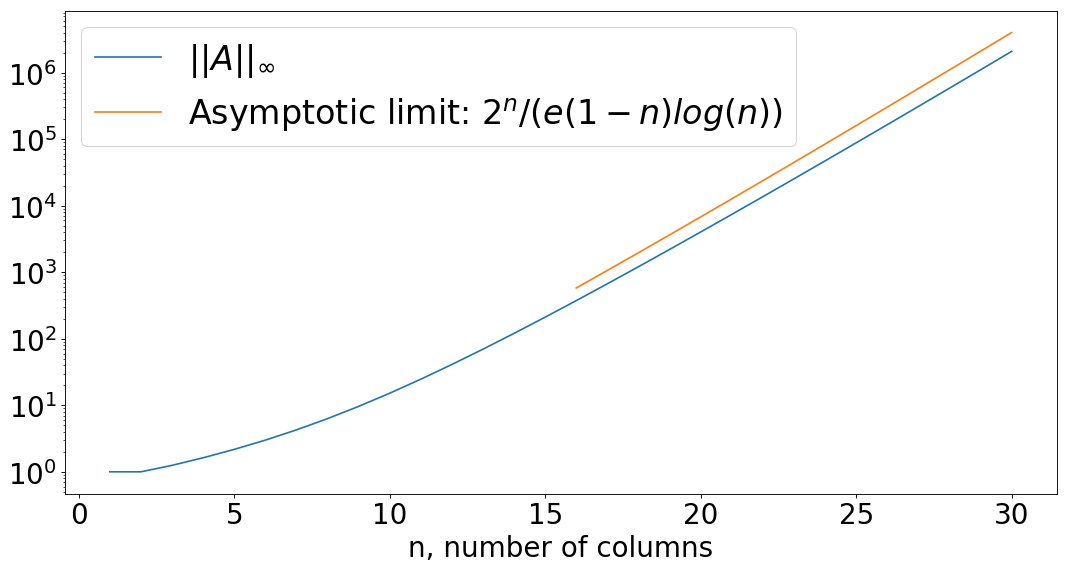

In [4]:
plt.plot(N,Inf_Norm,label='$||A||_\infty$')
plt.plot(N[15:],2**N[15:]/(np.e*(N[15:]-1)*np.log(N[15:])),
         label='Asymptotic limit: $2^n/(e(1-n)log(n))$')
plt.legend()
plt.yscale('log')
plt.xlabel('n, number of columns')
plt.show()